# Objectif DE LA MISSION

L'objectif principal est de répondre aux questions suivantes :

### 1. Proportion de personnes en état de sous-nutrition
Identifier combien de personnes dans le monde sont sous-alimentées en 2017.

### 2. Capacité théorique de nourrir la population
Calculer combien de personnes pourraient être nourries en utilisant la disponibilité alimentaire mondiale, en mettant l'accent sur les produits végétaux.

### 3. Utilisation de la disponibilité intérieure
Analyser la répartition de cette disponibilité entre l’alimentation animale, les pertes alimentaires, et l’alimentation humaine. Il faudra quantifier quelle part des ressources alimentaires est concrètement utilisée pour nourrir les humains, et quelle part est affectée à d'autres usages.

### En complément :
- La liste des pays ayant les taux de sous-nutrition les plus élevés en 2017.

In [1]:
import pandas as pd
import numpy as np

In [2]:
#IMPORTATION DES DONNEES#
dispo_alimentaire = pd.read_csv("file:data/dispo_alimentaire.csv")
#ajout de la colonne année car les données correspondent à ceux de l'année 2013#
dispo_alimentaire.insert(0, "Anneé", "2013") 
#renommage des colonnes#
dispo_alimentaire.rename\
(columns={"Disponibilité alimentaire (Kcal/personne/jour)":"da_kcal",
                                  "Disponibilité de matière grasse en quantité (g/personne/jour)":"matiere_grasse",
                                  "Disponibilité alimentaire en quantité (kg/personne/an)":"kg_pers",
                                  "Disponibilité de protéines en quantité (g/personne/jour)":"protéines"},inplace= True)


In [3]:
#IMPORTATION DES DONNEES#
sous_nutrition = pd.read_csv("file:data/sous_nutrition.csv")
#remplacement des valeurs dans le champs année#

sous_nutrition["Année"]= sous_nutrition["Année"].replace({'2012-2014', '2013-2015', '2014-2016', '2015-2017', '2016-2018',
       '2017-2019'}, {'2013', '2014', '2015', '2016', '2017', '2018'})

sous_nutrition["Valeur"]= sous_nutrition["Valeur"].replace('<0.1',"0.0") #remplacement de '<0.1' par "0" dans le champs Valeur#

sous_nutrition["Valeur"]=pd.to_numeric(sous_nutrition["Valeur"]) #changement du type Valeur str en int#

sous_nutrition.rename(columns={"Valeur":"sn_nombre"},inplace= True) #renommage du champs "Valeur" en "sn_nombre"#

sous_nutrition["sn_nombre"]=sous_nutrition["sn_nombre"]*1000000 #mise à jours de la valeur: elle etait exprimé en million"

In [4]:
#IMPORTATION DES DONNEES#
population = pd.read_csv("data/population.csv")

population=population.astype({"Année":"object"}) #changement du type "Année"  int en str#

population.rename(columns={"Valeur":"pop_nombre"},inplace= True)#renommage du champs "Valeur" en "pop_nombre"#

population["pop_nombre"]=population["pop_nombre"]*1000 #mise à jours de la valeur: elle etait exprimé en millier"


In [5]:
aide_alimentaire = pd.read_csv("file:data/aide_alimentaire.csv")
aide_alimentaire=aide_alimentaire.astype({"Année":object})
aide_alimentaire.rename(columns={"Valeur":"ai_quantité","Pays bénéficiaire":"Zone"},inplace= True)

# 1 - Disponibilité intérieure

La disponibilité intérieure peut être calculée selon la formule suivante :

**Disponibilité intérieure = Production + Importations - Pertes + Variation de stock**

Elle se répartit ensuite en plusieurs utilisations :

**Disponibilité intérieure = Exportations + Nourriture + Aliments pour animaux + Traitement + Autres Utilisations + Semences**

# 2 - Utilisation du manioc en Thailande


In [6]:
#Création de la df da_tm  qui correspond à la disponibilité alimentaire du manioc en Thailande#
da_tm=dispo_alimentaire.loc[dispo_alimentaire["Zone"].isin(["Thaïlande"]) & 
                            dispo_alimentaire["Produit"].isin(["Manioc"]),:]


In [7]:
#Calcul des proportions par rapport à la production#
proportion_export=round((da_tm["Exportations - Quantité"].sum()*100)/(da_tm["Production"].sum()),2)

proportion_nourriture=round((da_tm["Nourriture"].sum()*100)/da_tm["Production"].sum(),2)

proportion_animaux=round(((da_tm["Aliments pour animaux"].sum())*100)/
          da_tm["Production"].sum(),2)


In [52]:
print(f"Poportion exportée = {proportion_export}%, Proportion consonmée (nourriture)= \
{proportion_nourriture}%, Proportion annimaux = {proportion_animaux}%.")

Poportion exportée = 83.41%, Proportion consonmée (nourriture)= 2.88%, Proportion annimaux = 5.95%.


# Utilisation du Manioc en Thaïlande

- **Proportion exportée** : 83.41% 
- **Proportion consommée (nourriture)** : 2.88%
- **Proportion destinée à l'alimentation animale** : 5.95%

En 2013, **9.1% de la population thaïlandaise** était en état de sous-nutrition.

La consommation de manioc aurait pu nourrir **21.98% des personnes** en état de sous-nutrition.

Cependant, la Thaïlande ne produit pratiquement pas, ou en quantité très insuffisante, de **blé** ou de **soja** qui, s'ils étaient destinés à la nutrition humaine, pourraient nourrir **48% de sa population** en état de sous-nutrition.


## 3 - Utilisation des céréales 
Répartition entre l’alimentation humaine (colonne Nourriture) et l’alimentation pour animaux

In [9]:
#Recherche des valeurs de du champs produits#
dispo_alimentaire = dispo_alimentaire.sort_values(["Produit"])
dispo_alimentaire["Produit"].unique()

array(['Abats Comestible', 'Agrumes, Autres', 'Alcool, non Comestible',
       'Aliments pour enfants', 'Ananas', 'Animaux Aquatiques Autre',
       'Arachides Decortiquees', 'Avoine', 'Bananes', 'Bananes plantains',
       'Beurre, Ghee', 'Bière', 'Blé', 'Boissons Alcooliques',
       'Boissons Fermentés', 'Café', 'Cephalopodes', 'Citrons & Limes',
       'Coco (Incl Coprah)', 'Crustacés', 'Crème', 'Céréales, Autres',
       'Dattes', 'Edulcorants Autres', 'Feve de Cacao', 'Fruits, Autres',
       'Girofles', 'Graines Colza/Moutarde', 'Graines de coton',
       'Graines de tournesol', 'Graisses Animales Crue', 'Haricots',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Coco',
       'Huile de Colza&Moutarde', 'Huile de Germe de Maïs',
       'Huile de Palme', 'Huile de Palmistes', 'Huile de Soja',
       'Huile de Son de Riz', 'Huile de Sésame', 'Huile de Tournesol',
       'Huiles de Foie de Poisso', 'Huiles de Poisson

In [10]:
#Insertion de la data céréales de tout les pays sur l'année 2013 ( pris sur le site de la FAO#
#recherche des valeurs uniques du champs produits#
cereales = pd.read_csv("file:/Users/33618/OneDrive/Documents/ECOLE PROJET 4 12 09/Données/cereales.csv")
cereales["Produit"].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres'],
      dtype=object)

## 3- a- Utilisation des céréales: calcul basé sur la liste obtenue
['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres']


In [11]:
liste_cereales_FAO= ['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres']
#Création de la df da_cereales_FAO qui correspond à la disponibilité alimentaire des céréales suivant la liste FAC#
da_cereales_FAO=dispo_alimentaire.loc[dispo_alimentaire["Produit"].isin(liste_cereales_FAO),:]
da_cereales_FAO["Produit"].unique()
# seule les variables [Avoine', 'Céréales, Autres'] ont été prise en compte#

array(['Avoine', 'Céréales, Autres'], dtype=object)

## 3- a- 1- Calcul des proportions destinées aux animaux et à la nourriture par rapport au total destiné à ses deux utilisations

In [12]:
#Calcul des proportions destinées aux animaux et à la nourriture par rapport au total destiné à ses deux utilisations#
animaux =round(da_cereales_FAO["Aliments pour animaux"].sum()*100/
               (da_cereales_FAO["Aliments pour animaux"].sum()+ da_cereales_FAO["Nourriture"].sum()),2)
nourriture=round(da_cereales_FAO["Nourriture"].sum()*100/
                 (da_cereales_FAO["Aliments pour animaux"].sum()+ da_cereales_FAO["Nourriture"].sum()),2)
print(f"III - A-1- CONSOMMATION DES CEREALES \n{animaux}% de la consommation des céréales est destiné aux Aninaux\n{nourriture} % de la consommation des céréales est destiné à la nourriture humaine")


III - A-1- CONSOMMATION DES CEREALES 
79.27% de la consommation des céréales est destiné aux Aninaux
20.73 % de la consommation des céréales est destiné à la nourriture humaine


## 3- a- 2- Calcul des proportions destinées aux animaux et à la nourriture par rapport au total de la disponibilité intérieur

In [13]:
#Calcul des proportions destinées aux animaux et à la nourriture par rapport au total de la disponibilité intérieur#
animaux =round(da_cereales_FAO["Aliments pour animaux"].sum()*100/
               (da_cereales_FAO["Disponibilité intérieure"].sum()),2)
nourriture=round(da_cereales_FAO["Nourriture"].sum()*100/
                 (da_cereales_FAO["Disponibilité intérieure"].sum()),2)
print(f"III - A-2- CONSOMMATION DES CEREALES\n{animaux}% de la consommation des céréales est destiné aux Aninaux\n{nourriture} % de la consommation des céréales est destiné à la nourriture humaine")

# la somme du resulat n'est pas = 100% car les céréales sont utilisés dans d'autres poste comme les semences, traitement, pertes#

III - A-2- CONSOMMATION DES CEREALES
69.34% de la consommation des céréales est destiné aux Aninaux
18.13 % de la consommation des céréales est destiné à la nourriture humaine


## 3 - b - Utilisation des céréales: calcul basé sur la liste reconstituée 
["Seigle","Riz (Eq Blanchi)","Orge","Maïs","Céréales, Autres","Blé","Avoine","Sorgho", "Millet","Céréales, Autres","Huile de Germe de Maïs","Huile de Son de Riz"]

In [14]:
liste_cereales= ["Seigle","Riz (Eq Blanchi)","Orge","Maïs","Céréales, Autres","Blé","Avoine","Sorgho",
                 "Millet","Céréales, Autres","Huile de Germe de Maïs","Huile de Son de Riz"]
#Création de la df da_cereales qui correspond à la disponibilité alimentaire des céréales suivant la liste reconstituée#
da_cereales=dispo_alimentaire.loc[dispo_alimentaire["Produit"].isin(liste_cereales),:]
da_cereales["Produit"].unique()
#Toutes les variables ont été prise en compte#

array(['Avoine', 'Blé', 'Céréales, Autres', 'Huile de Germe de Maïs',
       'Huile de Son de Riz', 'Maïs', 'Millet', 'Orge',
       'Riz (Eq Blanchi)', 'Seigle', 'Sorgho'], dtype=object)

## 3- b-1- Calcul des proportions destinées aux animaux et à la nourriture par rapport au total de la disponibilité intérieur

In [15]:
#Calcul des proportions destinées aux animaux et à la nourriture par rapport au total de la disponibilité intérieur#
animaux =round(da_cereales["Aliments pour animaux"].sum()*100/
               (da_cereales["Disponibilité intérieure"].sum()),2)
nourriture=round(da_cereales["Nourriture"].sum()*100/
                 (da_cereales["Disponibilité intérieure"].sum()),2)
print(f"III - B-1- CONSOMMATION DES CEREALES\n{animaux}% de la consommation des céréales est destiné aux Aninaux\n{nourriture} % de la consommation des céréales est destiné à la nourriture humaine")


III - B-1- CONSOMMATION DES CEREALES
36.24% de la consommation des céréales est destiné aux Aninaux
42.82 % de la consommation des céréales est destiné à la nourriture humaine


79% de la production mondiale est destinée à l'alimentation des animaux et à la nourriture humaine.  ( )

## 3- b-2- Calcul des proportions destinées aux animaux et à la nourriture par rapport au total destiné à ses deux utilisations

In [16]:
#Calcul des proportions destinées aux animaux et à la nourriture par rapport au total destiné à ses deux utilisations#
animaux =round(da_cereales["Aliments pour animaux"].sum()*100/
               (da_cereales["Aliments pour animaux"].sum()+ da_cereales["Nourriture"].sum()),2)
nourriture=round(da_cereales["Nourriture"].sum()*100/
                 (da_cereales["Aliments pour animaux"].sum()+ da_cereales["Nourriture"].sum()),2)
print(f"III - B-1- CONSOMMATION DES CEREALES\n{animaux}% de la consommation des céréales est destiné aux Aninaux\n{nourriture} % de la consommation des céréales est destiné à la nourriture humaine")


III - B-1- CONSOMMATION DES CEREALES
45.84% de la consommation des céréales est destiné aux Aninaux
54.16 % de la consommation des céréales est destiné à la nourriture humaine


Le résultat qui semble correct dans la section III-B-2 indique que **45,84 % de la consommation des céréales** est destinée aux animaux, tandis que **54,16 % est consacrée à la nourriture humaine**.

Cela signifie que les humains consomment presque autant de céréales que les animaux. Ce constat soulève une question importante : **l'élevage en vaut-il vraiment la peine ?** 

En effet, près de la moitié des céréales est utilisée pour nourrir les animaux au lieu de directement répondre aux besoins alimentaires humains. Cette répartition interroge l'efficacité de l'utilisation des ressources agricoles, notamment dans un contexte mondial où la sécurité alimentaire est une préoccupation majeure. 


## 4 - Proportion de personnes en état de sous-nutrition (année 2017)

In [17]:
#filtre des valeurs de l'année 2017= sous_nutrition_2017#
sous_nutrition_2017=sous_nutrition.loc[sous_nutrition["Année"].isin(["2017"]),:]

sn_2017=sous_nutrition_2017.groupby("Zone").sum() #regroupement par pays =sn_2017 #


In [18]:
#filtre des valeurs de l'année 2017 = population_2017#
population_2017=population.loc[population["Année"].isin([2017]),:]

pop_2017=population_2017.groupby("Zone").sum() #regroupement par pays= pop_2017 = population de l'année 2017 par pays #


In [19]:
#fusion des df population 2017 et sous_nutrition 2017,  avec les valeurs de l'année 2017 (pop_sn_2017)#
pop_sn_2017 = pd.merge(pop_2017, sn_2017, how='outer',on=["Zone"])

#Création de la colonne ["taux_sn"] qui correspond au taux de sous nutrition par pays#
pop_sn_2017["taux_sn"]=round((pop_sn_2017["sn_nombre"]*100/pop_sn_2017["pop_nombre"]),2) 
pop_sn_2017.describe()

,pop_nombre,sn_nombre,taux_sn
count,2.360000e+02,2.030000e+02,203.000000
mean,3.198362e+07,2.680788e+06,6.096946
std,1.318949e+08,1.387234e+07,10.276502
min,7.930000e+02,0.000000e+00,0.000000
25%,3.803032e+05,0.000000e+00,0.000000
50%,5.203510e+06,0.000000e+00,0.000000
75%,1.930842e+07,1.150000e+06,8.070000
max,1.421022e+09,1.892000e+08,49.170000


In [20]:
#calcul de la proportion de personnes en état de sous-nutrition dans le monde  "p"#
p=round((pop_sn_2017["sn_nombre"].sum()*100/pop_sn_2017["pop_nombre"].sum()),2)

print(f"La proportion des personnes en état de sous nutrition en 2017 est {p}%")

La proportion des personnes en état de sous nutrition en 2017 est 7.21%


## 5 - Nombre théorique de personnes qui pourraient être nourries avec l'ensemble des productions (Année 2013)

NB: nous avons uniquement les données sur la disponibilité alimentaire de l'année 2013

In [21]:
# regroupement des quantités par pays- cération de la df da_2013 qui correpond à la disponibilité alimentaire de l'année 2013#
da_2013=dispo_alimentaire.groupby(["Zone"]).sum().round(2)


Au niveau national, une ration alimentaire inférieure à **2 200 kcal/jour** reflète un **très faible niveau de sécurité alimentaire** et un pourcentage élevé de la population touché par la malnutrition.

Un niveau supérieur à **2 700 kcal/jour** indique que seul un faible pourcentage de personnes est sous-alimenté.

Lorsque les personnes ont accès à la nourriture, la ration alimentaire par personne augmente rapidement mais se stabilise autour de **3 500 kcal/jour**.

(Source : FAO [https://www.fao.org/3/y4683f/y4683f07.htm](https://www.fao.org/3/y4683f/y4683f07.htm))


In [22]:
#calcul de proportion de kcal disponible par jour par habitant sur la base d'un besoin 2200 kcal/jour/personnes#

da_2013["taux_kcal"]=da_2013["da_kcal"]/2200

In [23]:
#filtre des valeurs de l'année 2013 = population_2013#
population_2013=population.loc[population["Année"].isin([2013]),:]

pop_2013=population_2013.groupby("Zone").sum() #regroupement par pays= pop_2013 = population de l'année 2013 par pays #

In [24]:
#fusion des df population 2013 et disponubilité alimentaire 2013  (pop_da_2013= disponibilité alimentaire par population en 2013)
da_pop_2013 = pd.merge(pop_2013, da_2013, how='outer',on=["Zone"])

#calcul du nombre théorique de personnes qui pourraient être nourries par pays 
# pop_da_2013["nbre_theorique_pers_nourries"] = ( proportion des kcal disponible /jour/pers  x nombre total de d'habitant)

da_pop_2013["nbre_theorique_pers_nourries"]=da_pop_2013["pop_nombre"]*da_pop_2013["taux_kcal"]



In [25]:
#calcul global du Nombre théorique de personnes qui pourraient être nourries dans le monde entier
# x= nombre de presonnes qui auraient pû être nourries en 2013
# z= % de personnes qui auraient pû être nourries en 2013 par rapport à la poplation total de l'année 2013
x=round((da_pop_2013["nbre_theorique_pers_nourries"].sum()/1000000000),1)
z=round((da_pop_2013["nbre_theorique_pers_nourries"].sum()*100/da_pop_2013["pop_nombre"].sum()),2)

print(f"En 2013,si toute la production  était destinée à la nourriture humaine,\nalors, le nombre de presonnes qui auraient pû être nourries en 2013 est {x} milliards\nCe qui correspond à {z}% de la population.")


En 2013,si toute la production  était destinée à la nourriture humaine,
alors, le nombre de presonnes qui auraient pû être nourries en 2013 est 9.1 milliards
Ce qui correspond à 126.35% de la population.


La production alimentaire mondiale est suffisante pour nourrir toute la population, mais elle est **inégalement répartie**. Certains pays ont un meilleur accès à la nourriture que d'autres, et l'aide alimentaire ne parvient pas à combler ces disparités.

Cette inégalité s'explique par divers facteurs, tels que :
- L'**évolution démographique**,
- Une **utilisation inefficace des ressources** disponibles,
- Un **manque d'accès** à ces ressources alimentaires.

Ces éléments contribuent à creuser l'écart entre les pays en matière de sécurité alimentaire, malgré une production globale suffisante.


## 6 - Nombre théorique de personnes qui pourraient être nourries avec les produits végétaux uniquement (Annéé 2013)

In [26]:
 # Création de la df da_v_2013 qui correspond à la disponibilité alimentaire des produits végétaux en 2013()  
da_v=dispo_alimentaire.loc[dispo_alimentaire["Origine"].isin(["vegetale"]),:] 

da_v_2013=da_v.groupby(["Zone"]).sum().round(2) #regroupement des quantités par pays 


In [27]:
#fusion des df population 2013 et disponubilité alimentaire des produits végétaux en 2013 = da_pop_v_2013
da_pop_v_2013 = pd.merge(pop_2013, da_v_2013, how='outer',on=["Zone"])

#calcul de proportion de kcal disponible par jour par habitant sur la base d'un besoin 2200 kcal/jour/personnes
da_pop_v_2013["taux_kcal"]=(da_pop_v_2013["da_kcal"]/2200)

#calcul du nombre théorique de personnes qui pourraient être nourries par pays
da_pop_v_2013["nbre_theorique_pers_nourries"]=da_pop_v_2013["pop_nombre"]*da_pop_v_2013["taux_kcal"]


In [28]:
#calcul global du Nombre théorique de personnes qui pourraient être nourries dans le monde entier
# x= nombre de presonnes qui auraient pû être nourries en 2013
# z= % de personnes qui auraient pû être nourries en 2013 par rapport à la poplation total de l'année 2013
x=round((da_pop_v_2013["nbre_theorique_pers_nourries"].sum()/1000000000),2)
z=round((da_pop_v_2013["nbre_theorique_pers_nourries"].sum()*100/da_pop_v_2013["pop_nombre"].sum()),2)

print(f"En 2013, la production Végétale aurait pû nourrir {x} milliards de personnes\nCe qui correspond à {z}% de la population.")


En 2013, la production Végétale aurait pû nourrir 7.5 milliards de personnes
Ce qui correspond à 104.05% de la population.


## 7 - Nombre théorique de personnes qui pourraient être nourries avec les produits animaliers uniquement (Annéé 2013)¶

In [29]:
 # Création de la df da_v_2013 qui correspond à la disponibilité alimentaire des produits animaliers en 2013()  
da_a=dispo_alimentaire.loc[dispo_alimentaire["Origine"].isin(["animale"]),:] 

da_a_2013=da_a.groupby(["Zone"]).sum().round(2) #regroupement des quantités par pays 

In [30]:
#fusion des df population 2013 et disponubilité alimentaire des produits animaliers en 2013 = da_pop_a_2013
da_pop_a_2013 = pd.merge(pop_2013, da_a_2013, how='outer',on=["Zone"])

#calcul de proportion de kcal disponible par jour par habitant sur la base d'un besoin 2200 kcal/jour/personnes
da_pop_a_2013["taux_kcal"]=(da_pop_a_2013["da_kcal"]/2200)

#calcul du nombre théorique de personnes qui pourraient être nourries par pays
da_pop_a_2013["nbre_theorique_pers_nourries"]=da_pop_a_2013["pop_nombre"]*da_pop_a_2013["taux_kcal"]

In [31]:
#calcul global du Nombre théorique de personnes qui pourraient être nourries dans le monde entier
# x= nombre de presonnes qui auraient pû être nourries en 2013
# z= % de personnes qui auraient pû être nourries en 2013 par rapport à la poplation total de l'année 2013
x=round((da_pop_a_2013["nbre_theorique_pers_nourries"].sum()/1000000000),2)
z=round((da_pop_a_2013["nbre_theorique_pers_nourries"].sum()*100/da_pop_a_2013["pop_nombre"].sum()),2)
print(f"En 2013,si toute la production Animale était destinée à la nourriture humaine,\nalors, le nombre de presonnes qui auraient pû être nourries en 2013 est {x} milliards\nCe qui correspond à {z}% de la population.")


En 2013,si toute la production Animale était destinée à la nourriture humaine,
alors, le nombre de presonnes qui auraient pû être nourries en 2013 est 1.61 milliards
Ce qui correspond à 22.3% de la population.


## 8-  Repartition de la disponibilité intérieur 

= Production + Importations- Exportations + Variation de stock

= Pertes + Nourriture + Aliments pour animaux + Traitement + Autres Utilisations + Semences

In [32]:
#calcul de la repartition de la disponibilité intérieur des produits animaliers

Nourriture= round((da_pop_a_2013["Nourriture"].sum()*100/da_pop_a_2013["Disponibilité intérieure"].sum()),2)
Traitement= round((da_pop_a_2013["Traitement"].sum()*100/da_pop_a_2013["Disponibilité intérieure"].sum()),2)
Semences= round((da_pop_a_2013["Semences"].sum()*100/da_pop_a_2013["Disponibilité intérieure"].sum()),2)
Pertes= round((da_pop_a_2013["Pertes"].sum()*100/da_pop_a_2013["Disponibilité intérieure"].sum()),2)
Aliments_pour_animaux= round((da_pop_a_2013["Aliments pour animaux"].sum()*100/da_pop_a_2013["Disponibilité intérieure"].sum()),2)
Autres_utilisations= round((da_pop_a_2013["Autres Utilisations"].sum()*100/da_pop_a_2013["Disponibilité intérieure"].sum()),2)

print(f"Repartition de la disponibilité intérieur des produits animaliers\nNourriture = {Nourriture} %\nTraitement = {Traitement} %\nSemences = {Semences} %\nPertes = {Pertes} %\nAliments pour animaux = {Aliments_pour_animaux} %\nAutres Utilisations = {Autres_utilisations} %")

Repartition de la disponibilité intérieur des produits animaliers
Nourriture = 86.61 %
Traitement = 0.07 %
Semences = 0.41 %
Pertes = 1.75 %
Aliments pour animaux = 7.87 %
Autres Utilisations = 3.38 %


In [33]:
#calcul de la repartition de la disponibilité intérieur des produits végétaux
Nourriture= round((da_pop_v_2013["Nourriture"].sum()*100/da_pop_v_2013["Disponibilité intérieure"].sum()),2)
Traitement= round((da_pop_v_2013["Traitement"].sum()*100/da_pop_v_2013["Disponibilité intérieure"].sum()),2)
Semences= round((da_pop_v_2013["Semences"].sum()*100/da_pop_v_2013["Disponibilité intérieure"].sum()),2)
Pertes= round((da_pop_v_2013["Pertes"].sum()*100/da_pop_v_2013["Disponibilité intérieure"].sum()),2)
Aliments_pour_animaux= round((da_pop_v_2013["Aliments pour animaux"].sum()*100/
                              da_pop_v_2013["Disponibilité intérieure"].sum()),2)
Autres_utilisations= round((da_pop_v_2013["Autres Utilisations"].sum()*100/da_pop_v_2013["Disponibilité intérieure"].sum()),2)
print(f"Repartition de la disponibilité intérieur des produits végétaux\nNourriture = {Nourriture} %\nTraitement = {Traitement} %\nSemences = {Semences} %\nPertes = {Pertes} %\nAliments pour animaux = {Aliments_pour_animaux} %\nAutres Utilisations = {Autres_utilisations} %")

Repartition de la disponibilité intérieur des produits végétaux
Nourriture = 43.53 %
Traitement = 25.98 %
Semences = 1.76 %
Pertes = 5.07 %
Aliments pour animaux = 14.11 %
Autres Utilisations = 9.65 %


In [34]:
#calcul de la repartition de la disponibilité intérieur de la disponibilité intérieure globale

Nourriture= round((da_2013["Nourriture"].sum()*100/da_2013["Disponibilité intérieure"].sum()),2)
Traitement= round((da_2013["Traitement"].sum()*100/da_2013["Disponibilité intérieure"].sum()),2)
Semences= round((da_2013["Semences"].sum()*100/da_2013["Disponibilité intérieure"].sum()),2)
Pertes= round((da_2013["Pertes"].sum()*100/da_2013["Disponibilité intérieure"].sum()),2)
Aliments_pour_animaux= round((da_2013["Aliments pour animaux"].sum()*100/da_2013["Disponibilité intérieure"].sum()),2)
Autres_utilisations= round((da_2013["Autres Utilisations"].sum()*100/da_2013["Disponibilité intérieure"].sum()),2)

print(f"Repartition de la disponibilité intérieur globale\nNourriture = {Nourriture} %\nTraitement = {Traitement} %\nSemences = {Semences} %\nPertes = {Pertes} %\nAliments pour animaux = {Aliments_pour_animaux} %\nAutres Utilisations = {Autres_utilisations} %")

Repartition de la disponibilité intérieur globale
Nourriture = 49.51 %
Traitement = 22.38 %
Semences = 1.57 %
Pertes = 4.61 %
Aliments pour animaux = 13.24 %
Autres Utilisations = 8.78 %


La production mondiale de **produits végétaux** est largement suffisante pour nourrir l’ensemble de la population mondiale et pourrait même répondre aux besoins de **4 % de personnes supplémentaires**. En revanche, les **produits d’origine animale** ne permettent de nourrir que **22 % de la population**, ce qui met en évidence une différence importante entre les deux types de production.

Cette différence devient encore plus significative lorsqu’on réalise que **45 % de la production mondiale de céréales** est utilisée pour nourrir les animaux.

Actuellement, **14 % de la production végétale** est directement consommée par les animaux. Si cette proportion était redirigée vers l'alimentation humaine, il serait possible de nourrir **90 % de la population mondiale** uniquement avec des produits végétaux. En comparaison, la production animale ne pourrait nourrir que **22 % de la population** même si elle était intégralement utilisée pour cela.

En parallèle, on observe que seulement **43 % de la production végétale** est destinée à l'alimentation humaine, tandis que **86 % de la production animale** est directement utilisée pour nourrir les gens. Cela souligne une répartition inégale des ressources, avec une partie importante des végétaux (**35 %**) utilisée à d'autres fins, comme l’industrie ou le traitement des produits, contre **4 %** pour les produits d'origine animale.

En résumé, l'élevage apparaît comme une **utilisation inefficace des ressources alimentaires**, car il consomme une grande partie des céréales disponibles, sans pour autant nourrir autant de personnes que pourrait le faire une production végétale plus orientée vers l’alimentation humaine. Réorienter une plus grande partie de la production végétale vers l’alimentation humaine, au lieu de nourrir les animaux, pourrait être une solution pour **réduire la sous-nutrition** dans le monde.


## 9- Pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

In [35]:
#trie de la df pop_sn_2017(population + sous nutrition année 2017)
pop_sn_2017_desc=pop_sn_2017.sort_values(by="taux_sn", ascending=False)
print(f"les 20 pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017 sont les suivants:")
pop_sn_2017_desc[0:20]

les 20 pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017 sont les suivants:


,pop_nombre,sn_nombre,taux_sn
Zone,,,
Haïti,10982366.0,5400000.0,49.17
République populaire démocratique de Corée,25429825.0,12200000.0,47.98
Madagascar,25570512.0,11000000.0,43.02
Tchad,15016753.0,6100000.0,40.62
Libéria,4702226.0,1800000.0,38.28
Rwanda,11980961.0,4400000.0,36.72
Mozambique,28649018.0,9600000.0,33.51
Lesotho,2091534.0,700000.0,33.47
Timor-Leste,1243258.0,400000.0,32.17


## 10- Pays qui ont le plus bénéficiés d’aide depuis 2013
ceux ayant le plus/le moins de disponibilité/habitant

In [36]:
# regroupement de l'aide alimentaire de l'année 2013 par pays
ai_df=aide_alimentaire.groupby("Zone").sum()
ai_df_desc=ai_df.sort_values(by="ai_quantité", ascending=False)
print(f"les 20 pays ayant le plus beneficiés de l'aide alimentaire depuis 2013 sant les suivants:")
ai_df_desc[:20]

les 20 pays ayant le plus beneficiés de l'aide alimentaire depuis 2013 sant les suivants:


,ai_quantité
Zone,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836
Bangladesh,348188
Somalie,292678
République démocratique du Congo,288502


In [37]:
aide_alimentaire.head()


,Zone,Année,Produit,ai_quantité
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [38]:
aide_alimentaire.head()
x=aide_alimentaire.groupby(["Zone","Année"])["ai_quantité"].sum()
#y=x.sort_values(by="ai_quantité Sum", ascending=False)["Zone","Année","ai_quantité"]
x.head()

Zone         Année
Afghanistan  2013     128238
             2014      57214
Algérie      2013      35234
             2014      18980
             2015      17424
Name: ai_quantité, dtype: int64

## 11- Pays ayant le plus de Disponibilité par habitant en 2013

In [39]:
# regroupement de l'aide alimentaire de l'année 2013 par pays
ai_2013=aide_alimentaire.groupby("Zone").sum()

#filtre des valeurs de l'année 2013= sous_nutrition_2013#
sous_nutrition_2013=sous_nutrition.loc[sous_nutrition["Année"].isin(["2013"]),:]

sn_2013=sous_nutrition_2013.groupby("Zone").sum() #regroupement par pays = sn_2013 

#fusion des df population 2013 , sous nutrition 2013, aide alimentaire 2013 et disponibilité alimentaire 2013= df_2013
from functools import reduce

liste_df= [pop_2013, sn_2013,ai_2013,da_2013] #liste des df à fusionner

df_2013 = reduce(lambda  left,right: pd.merge(left,right,on=['Zone'],
                                            how='outer'), liste_df)

#recherche et suppression des valeurs NaN
df_2013["xxx"]=df_2013.isna().sum(axis=1)
df_2013.sort_values(by="xxx",ascending=False)
df_2013=df_2013.drop(df_2013[df_2013.xxx >14].index)


#Création de la colonne ["taux_sn"] qui correspond au taux de sous nutrition par pays#
df_2013["taux_sn"]=round((df_2013["sn_nombre"]*100/df_2013["pop_nombre"]),2)

#Création de la colonne ["%exportations"] qui correspond à la proportion des exportations par rapprt à la disponibilité intérieure
df_2013["%exportations"]=round((df_2013["Exportations - Quantité"]*100/df_2013["Disponibilité intérieure"]),2)


#Création de la colonne ["%Importation"] qui correspond à la proportion des importations par rapprt à la disponibilité intérieure
df_2013["%Importations"]=round((df_2013["Importations - Quantité"]*100/df_2013["Disponibilité intérieure"]),2)

df_2013.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, Afghanistan to Tchéquie (la)
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pop_nombre                172 non-null    float64
 1   sn_nombre                 172 non-null    float64
 2   ai_quantité               66 non-null     float64
 3   Aliments pour animaux     174 non-null    float64
 4   Autres Utilisations       174 non-null    float64
 5   da_kcal                   174 non-null    float64
 6   kg_pers                   174 non-null    float64
 7   matiere_grasse            174 non-null    float64
 8   protéines                 174 non-null    float64
 9   Disponibilité intérieure  174 non-null    float64
 10  Exportations - Quantité   174 non-null    float64
 11  Importations - Quantité   174 non-null    float64
 12  Nourriture                174 non-null    float64
 13  Pertes                    174 non-null    float64


In [40]:
# trie du df df_2013 par quantité de Disponibilité alimentaire /kcal/personne

dispo_da_kcal_sup_habitant=df_2013.sort_values(by="da_kcal", ascending=False)[["da_kcal","Disponibilité intérieure","ai_quantité","taux_sn"]]

print(f"les 10 pays ayant le plus de Disponibilité par habitant en 2013 sont les suivants:")

dispo_da_kcal_sup_habitant[:10]

les 10 pays ayant le plus de Disponibilité par habitant en 2013 sont les suivants:


,da_kcal,Disponibilité intérieure,ai_quantité,taux_sn
Zone,,,,
Autriche,3770.0,19308.0,NaN,0.00
Belgique,3737.0,29358.0,NaN,0.00
Turquie,3708.0,131377.0,NaN,0.00
États-Unis d'Amérique,3682.0,777992.0,NaN,0.00
Israël,3610.0,11267.0,NaN,0.00
Irlande,3602.0,10738.0,NaN,0.00
Italie,3578.0,97405.0,NaN,0.00
Luxembourg,3540.0,802.0,NaN,0.00
Égypte,3518.0,115133.0,1122.0,4.98


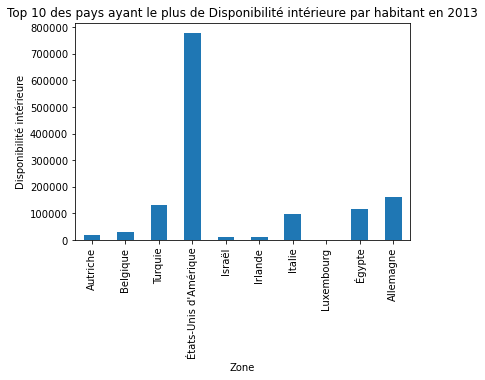

In [41]:
import matplotlib.pyplot as plt

top_10_countries = dispo_da_kcal_sup_habitant[:10]
top_10_countries.plot(kind='bar', y='Disponibilité intérieure', legend=False)
plt.title("Top 10 des pays ayant le plus de Disponibilité intérieure par habitant en 2013")
plt.ylabel("Disponibilité intérieure")
plt.show()

## 12- Pays ayant le moins de Disponibilité en 2013

In [42]:
# trie du df df_2013 par quantité de Disponibilité alimentaire /kcal/personne
dispo_da_kcal_inf_habitant=df_2013.sort_values(by="da_kcal",ascending=True)[[ "da_kcal","Disponibilité intérieure","ai_quantité","taux_sn"]]
print(f"les 10 pays ayant le moins de Disponibilité par habitant en 2013 sont les suivants:")

dispo_da_kcal_inf_habitant[:10]

les 10 pays ayant le moins de Disponibilité par habitant en 2013 sont les suivants:


,da_kcal,Disponibilité intérieure,ai_quantité,taux_sn
Zone,,,,
République centrafricaine,1879.0,2582.0,66610.0,0.00
Zambie,1924.0,10041.0,3026.0,0.00
Madagascar,2056.0,15216.0,96678.0,33.10
Afghanistan,2087.0,13515.0,185452.0,26.65
Haïti,2089.0,6175.0,116450.0,49.04
République populaire démocratique de Corée,2093.0,14876.0,187412.0,41.32
Tchad,2109.0,5304.0,267966.0,37.06
Zimbabwe,2113.0,9507.0,62570.0,0.00
Ouganda,2126.0,26624.0,64622.0,0.00


Une **disponibilité intérieure élevée** ne garantit pas forcément un **bon niveau alimentaire**. 

Par exemple, en **Égypte**, bien que la disponibilité alimentaire par habitant soit importante, le **taux de sous-nutrition** reste à **5 %**. 

Cela peut s'expliquer par :
- Un **accès limité** à la nourriture pour certaines populations,
- Une **gestion inefficace des ressources alimentaires**.

Ainsi, une disponibilité élevée ne se traduit pas nécessairement par une réduction de la sous-nutrition, surtout si des facteurs socio-économiques limitent l'accès équitable aux ressources alimentaires.
